In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [7]:
data = pd.read_csv('OnlineRetail.csv', encoding= 'unicode_escape')
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [8]:
data.shape

(541909, 8)

In [10]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


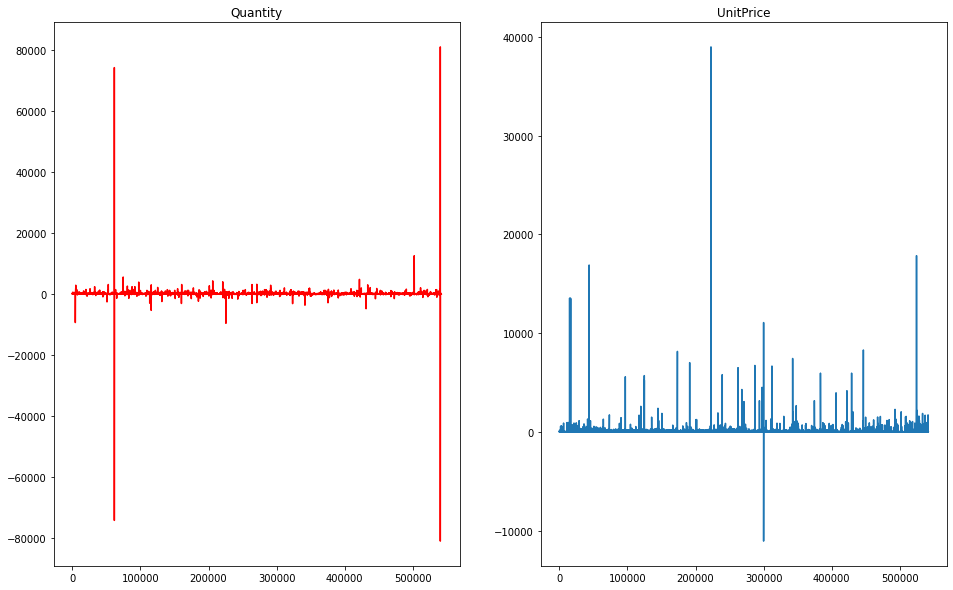

In [11]:
#Xem phân bố dữ liệu
plt.figure(figsize=(16,10))
plt.subplot(1,2,1)
plt.plot(data['Quantity'], color='red')#, labels = ['Quantity'])
plt.title('Quantity')

plt.subplot(1,2,2)
plt.plot(data['UnitPrice'])#, labels = ['UnitPrice'])
plt.title('UnitPrice')

plt.show()

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,Total,Percent
CustomerID,135080,0.249267
Description,1454,0.002683
Country,0,0.000000
UnitPrice,0,0.000000
InvoiceDate,0,0.000000


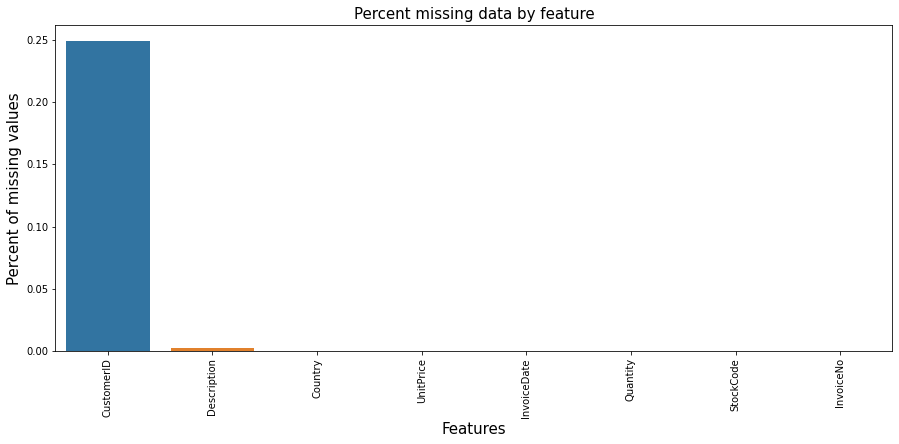

In [13]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

In [14]:

data = data.dropna()
data.shape


(406829, 8)

In [15]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


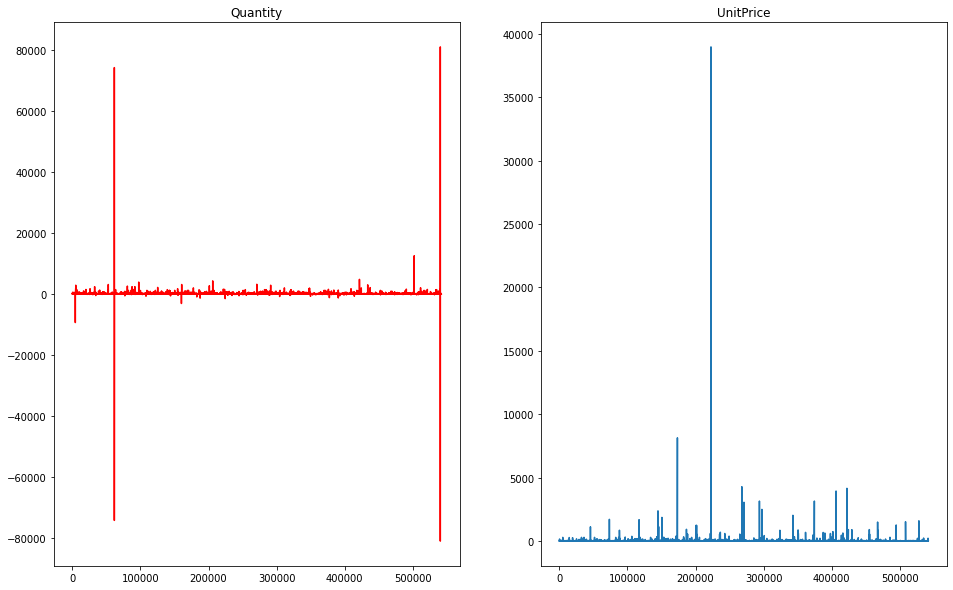

In [16]:
#Xem lại dữ liệu
plt.figure(figsize=(16,10))
plt.subplot(1,2,1)
plt.plot(data['Quantity'], color='red')#, labels = ['Quantity'])
plt.title('Quantity')

plt.subplot(1,2,2)
plt.plot(data['UnitPrice'])#, labels = ['UnitPrice'])
plt.title('UnitPrice')

plt.show()

In [17]:

min_Quantity = data[data.Quantity==-80995]
min_Quantity


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,09-12-2011 09:27,2.08,16446.0,United Kingdom


In [18]:
min_Cus = data[data.CustomerID==16446.0]
min_Cus

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
194354,553573,22980,PANTRY SCRUBBING BRUSH,1,18-05-2011 09:52,1.65,16446.0,United Kingdom
194355,553573,22982,PANTRY PASTRY BRUSH,1,18-05-2011 09:52,1.25,16446.0,United Kingdom
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,09-12-2011 09:15,2.08,16446.0,United Kingdom
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,09-12-2011 09:27,2.08,16446.0,United Kingdom


In [19]:
min_Invoice = data[data.InvoiceNo=='581483']
min_Invoice

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,09-12-2011 09:15,2.08,16446.0,United Kingdom


In [20]:
#df = df.drop(df[(df.score < 50) & (df.score > 20)].index)
data = data.drop(data[data.InvoiceNo=='581483'].index)
data = data.drop(data[data.InvoiceNo=='C581484'].index)
data.describe()

,Quantity,UnitPrice,CustomerID
count,406827.000000,406827.000000,406827.000000
mean,12.061363,3.460478,15287.684876
std,172.040989,69.315332,1713.602591
min,-74215.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,74215.000000,38970.000000,18287.000000


In [21]:
min_Quantity1 = data[data.Quantity==-74215]
min_Quantity1


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,18-01-2011 10:17,1.04,12346.0,United Kingdom


In [22]:
min_Cus1 = data[data.CustomerID==12346.0]
min_Cus1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,18-01-2011 10:01,1.04,12346.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,18-01-2011 10:17,1.04,12346.0,United Kingdom


In [23]:
data = data.drop(data[data.InvoiceNo=='541431'].index)
data = data.drop(data[data.InvoiceNo=='C541433'].index)
data.describe()

,Quantity,UnitPrice,CustomerID
count,406825.000000,406825.000000,406825.000000
mean,12.061422,3.460490,15287.699338
std,50.208125,69.315502,1713.594390
min,-9360.000000,0.000000,12347.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,12540.000000,38970.000000,18287.000000


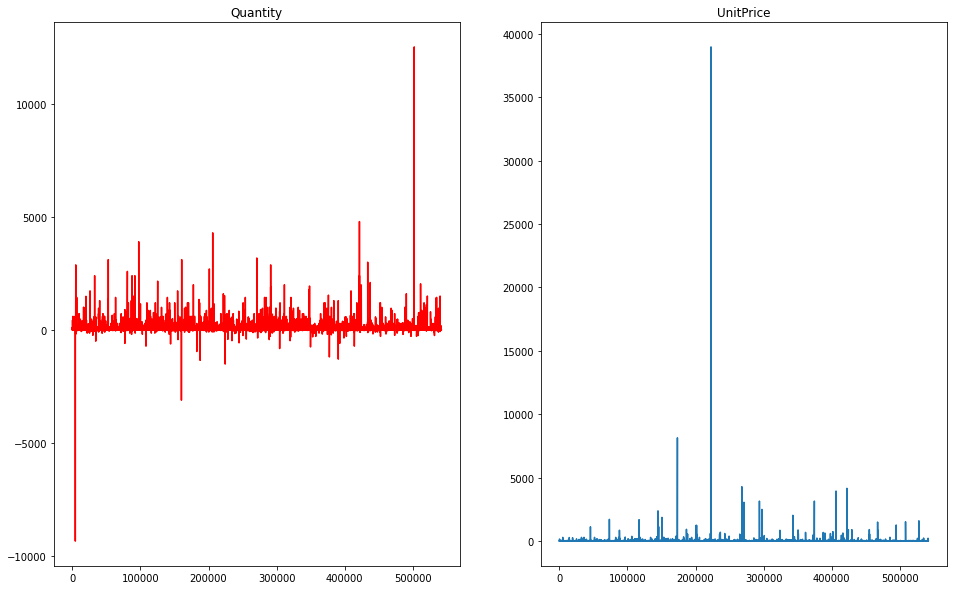

In [24]:
#Xem lại dữ liệu
plt.figure(figsize=(16,10))
plt.subplot(1,2,1)
plt.plot(data['Quantity'], color='red')#, labels = ['Quantity'])
plt.title('Quantity')

plt.subplot(1,2,2)
plt.plot(data['UnitPrice'])#, labels = ['UnitPrice'])
plt.title('UnitPrice')

plt.show()

In [25]:
data['CustomerID'] = data['CustomerID'].astype(str)

In [26]:
#Xử lý dữ liệu theo mô hình RFM:
#R_Recency: Khoảng thời gian mua hàng gần nhất của khách hàng.
#F_Frequency: Tần suất mua hàng của khách hàng.
#M_Monetary: Là số tiền chi tiêu của khách hàng.


In [27]:
data['Amount'] = data['Quantity']*data['UnitPrice']
Monetary = data.groupby('CustomerID')['Amount'].sum()
Monetary = Monetary.reset_index()
Monetary.head()


,CustomerID,Amount
0,12347.0,4310.00
1,12348.0,1797.24
2,12349.0,1757.55
3,12350.0,334.40
4,12352.0,1545.41


In [28]:
Frequency = data.groupby('CustomerID')['InvoiceNo'].count()
Frequency = Frequency.reset_index()
Frequency.columns = ['CustomerID', 'Frequency']
Frequency.head()

,CustomerID,Frequency
0,12347.0,182
1,12348.0,31
2,12349.0,73
3,12350.0,17
4,12352.0,95


In [29]:
RFM = pd.merge(Monetary, Frequency, on='CustomerID', how='inner')
RFM

,CustomerID,Amount,Frequency
0,12347.0,4310.00,182
1,12348.0,1797.24,31
2,12349.0,1757.55,73
3,12350.0,334.40,17
4,12352.0,1545.41,95
...,...,...,...
4366,18280.0,180.60,10
4367,18281.0,80.82,7
4368,18282.0,176.60,13
4369,18283.0,2094.88,756


In [30]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

max_date = max(data['InvoiceDate'])
#max_date

data['Recency'] = max_date - data['InvoiceDate']
#data.head()

Recency = data.groupby('CustomerID')['Recency'].min()
Recency = Recency.reset_index()
Recency['Recency'] = Recency['Recency'].dt.days
Recency.head()

,CustomerID,Recency
0,12347.0,40
1,12348.0,76
2,12349.0,19
3,12350.0,311
4,12352.0,73


In [31]:

RFM = pd.merge(RFM, Recency, on='CustomerID', how='inner')
RFM.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
RFM.head()

,CustomerID,Amount,Frequency,Recency
0,12347.0,4310.00,182,40
1,12348.0,1797.24,31,76
2,12349.0,1757.55,73,19
3,12350.0,334.40,17,311
4,12352.0,1545.41,95,73


Text(0.5, 0, 'Attributes')

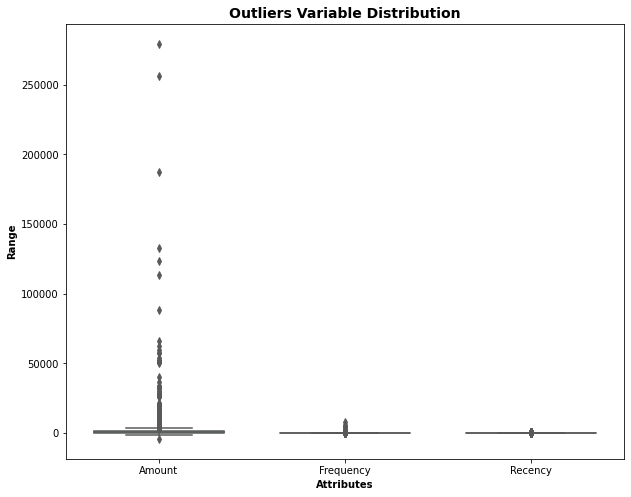

In [32]:
attributes = ['Amount','Frequency','Recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = RFM[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')


In [33]:
# Removing (statistical) outliers for Amount
Q1 = RFM.Amount.quantile(0.05)
Q3 = RFM.Amount.quantile(0.95)
IQR = Q3 - Q1
RFM = RFM[(RFM.Amount >= Q1 - 1.5*IQR) & (RFM.Amount <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = RFM.Recency.quantile(0.05)
Q3 = RFM.Recency.quantile(0.95)
IQR = Q3 - Q1
RFM = RFM[(RFM.Recency >= Q1 - 1.5*IQR) & (RFM.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = RFM.Frequency.quantile(0.05)
Q3 = RFM.Frequency.quantile(0.95)
IQR = Q3 - Q1
RFM = RFM[(RFM.Frequency >= Q1 - 1.5*IQR) & (RFM.Frequency <= Q3 + 1.5*IQR)]



Text(0.5, 0, 'Attributes')

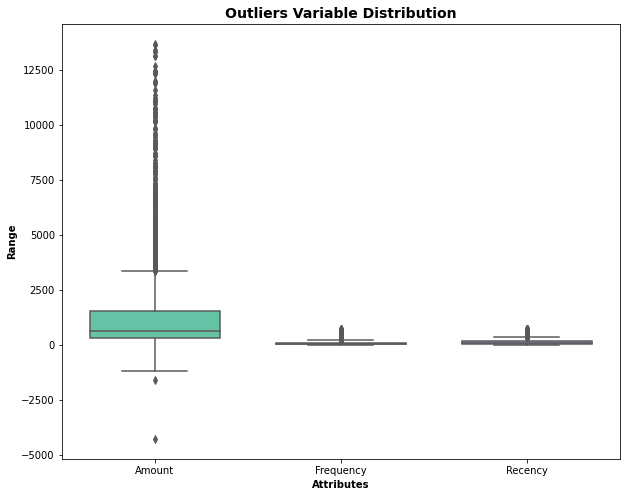

In [34]:
attributes = ['Amount','Frequency','Recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = RFM[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')


In [35]:
# Rescaling the attributes

df_RFM = RFM[['Amount', 'Frequency', 'Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
RFM_df_scaled = scaler.fit_transform(df_RFM)
RFM_df_scaled.shape


(4292, 3)

In [36]:
RFM_df_scaled = pd.DataFrame(RFM_df_scaled)
RFM_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
RFM_df_scaled.head()


,Amount,Frequency,Recency
0,1.731353,1.042240,-0.546894
1,0.299943,-0.463782,-0.231929
2,0.277333,-0.044888,-0.730623
3,-0.533374,-0.603413,1.824092
4,0.156486,0.174532,-0.258176


In [37]:

kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(RFM_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [38]:
kmeans.labels_


array([1, 3, 3, ..., 3, 3, 3], dtype=int32)

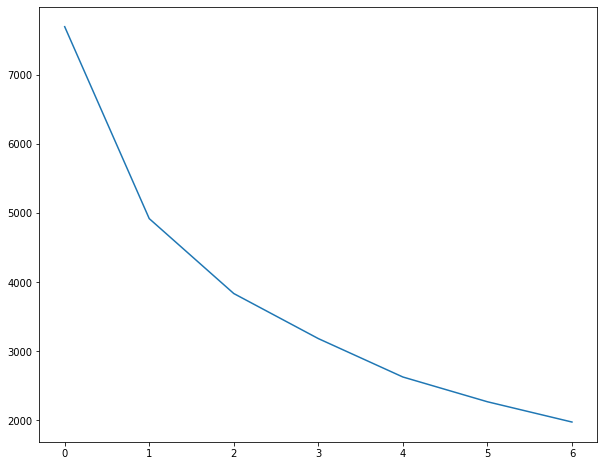

In [39]:

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(RFM_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

In [40]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(RFM_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [41]:

# assign the label
RFM['Cluster_Id'] = kmeans.labels_
RFM.head()


,CustomerID,Amount,Frequency,Recency,Cluster_Id
0,12347.0,4310.00,182,40,1
1,12348.0,1797.24,31,76,0
2,12349.0,1757.55,73,19,0
3,12350.0,334.40,17,311,2
4,12352.0,1545.41,95,73,0


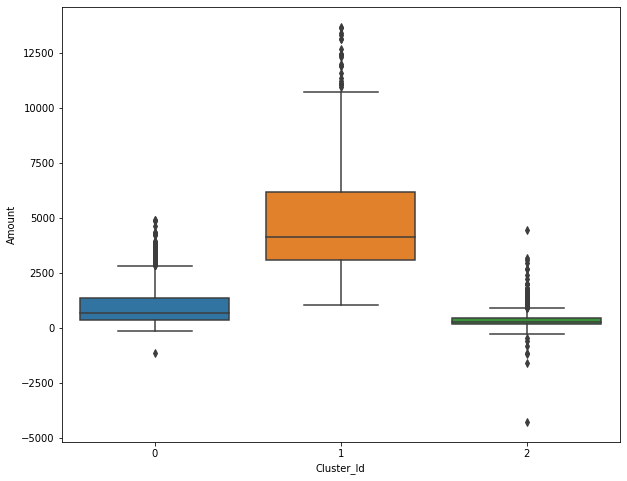

In [42]:
sns.boxplot(x='Cluster_Id', y='Amount', data=RFM)

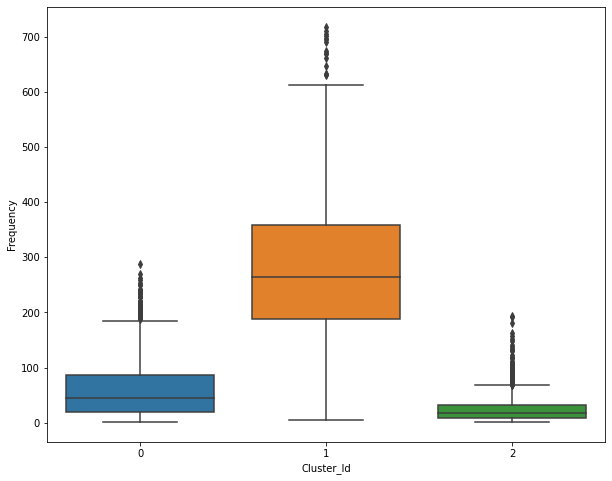

In [43]:
sns.boxplot(x='Cluster_Id', y='Frequency', data=RFM)

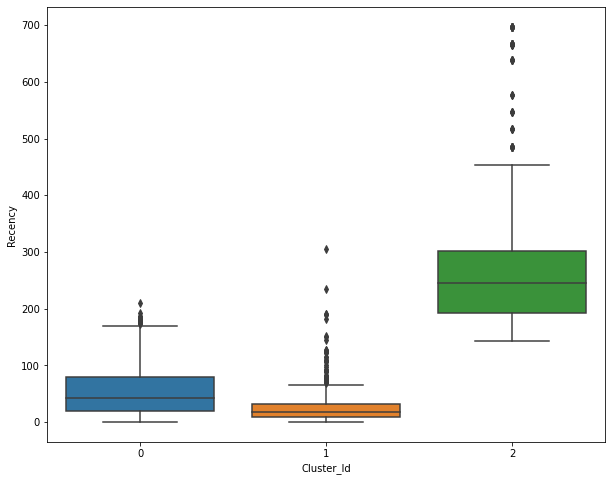

In [44]:
sns.boxplot(x='Cluster_Id', y='Recency', data=RFM)

In [45]:
thres_decide = 0.50

In [46]:
def get_percentile_value(data, percentiles):
    result = np.percentile(data, percentiles)
    return result

Amount_value = get_percentile_value(data=RFM['Amount'], percentiles=[25,75])
Frequency_value = get_percentile_value(data=RFM['Frequency'], percentiles=[25,75])
Recency_value = get_percentile_value(data=RFM['Recency'], percentiles=[25,75])



In [47]:
def get_percentile_code(data, percentiles_value):
    num_percentiles = len(percentiles_value)
    result = [0]*(num_percentiles + 1)
    if data >= percentiles_value[-1]:
        result[-1] = 1
    else:
        for i in range(0, num_percentiles):
            if data < percentiles_value[i]:
                result[i]=1
                break
    return pd.Series(result)

RFM[['Amount_low', 'Amount_medium', 'Amount_high']]=RFM['Amount'].apply(get_percentile_code, percentiles_value=Amount_value)
RFM[['Frequency_low', 'Frequency_medium', 'Frequency_high']]=RFM['Frequency'].apply(get_percentile_code, percentiles_value=Frequency_value)
RFM[['Recency_low', 'Recency_medium', 'Recency_high']]=RFM['Recency'].apply(get_percentile_code, percentiles_value=Recency_value)



In [48]:

for group in np.unique(RFM['Cluster_Id']):
    print('\n\nGROUP: ', group)
    group_data = RFM[RFM['Cluster_Id']==group]
    
    Amount = np.mean(group_data[['Amount_low', 'Amount_medium', 'Amount_high']])
    if Amount.loc['Amount_low'] > thres_decide:
        print('Amount_low')
    if Amount.loc['Amount_medium'] > thres_decide:
        print('Amount_medium')
    if Amount.loc['Amount_high'] > thres_decide:
        print('Amount_high')
    
    Frequency = np.mean(group_data[['Frequency_low', 'Frequency_medium', 'Frequency_high']])
    if Frequency.loc['Frequency_low'] > thres_decide:
        print('Frequency_low')
    if Frequency.loc['Frequency_medium'] > thres_decide:
        print('Frequency_medium')
    if Frequency.loc['Frequency_high'] > thres_decide:
        print('Frequency_high')
    
    Recency = np.mean(group_data[['Recency_low', 'Recency_medium', 'Recency_high']])
    if Recency.loc['Recency_low'] > thres_decide:
        print('Recency_low')
    if Recency.loc['Recency_medium'] > thres_decide:
        print('Recency_medium')
    if Recency.loc['Recency_high'] > thres_decide:
        print('Recency_high')




GROUP:  0
Amount_medium
Frequency_medium
Recency_medium


GROUP:  1
Amount_high
Frequency_high
Recency_low


GROUP:  2
Amount_low
Recency_high


In [49]:
RFM['Cluster_Id'] = kmeans.labels_
RFM.head()


,CustomerID,Amount,Frequency,Recency,Cluster_Id,Amount_low,Amount_medium,Amount_high,Frequency_low,Frequency_medium,Frequency_high,Recency_low,Recency_medium,Recency_high
0,12347.0,4310.00,182,40,1,0,0,1,0,0,1,0,1,0
1,12348.0,1797.24,31,76,0,0,0,1,0,1,0,0,1,0
2,12349.0,1757.55,73,19,0,0,0,1,0,1,0,1,0,0
3,12350.0,334.40,17,311,2,0,1,0,0,1,0,0,0,1
4,12352.0,1545.41,95,73,0,0,0,1,0,1,0,0,1,0
